In [159]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

In [160]:
from sklearn.linear_model import LogisticRegression

In [161]:
titanic=sns.load_dataset("titanic")
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [162]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Data Analysis

In [163]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [164]:
#sns.heatmap()

In [165]:
titanic['age'].isnull().sum()/titanic.shape[0]*100

19.865319865319865

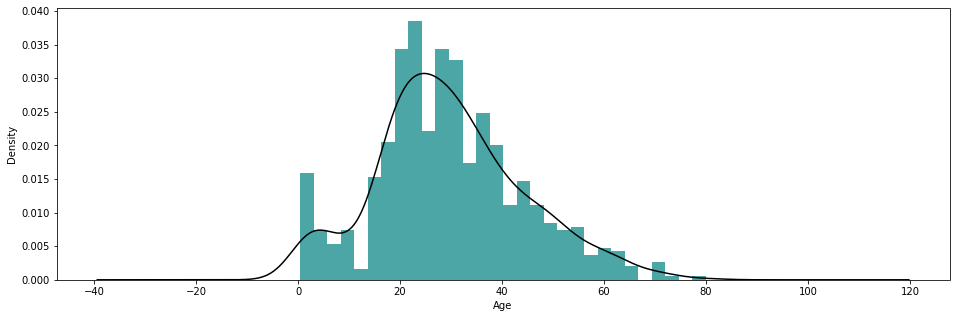

In [166]:
ax = titanic['age'].hist(bins=30,density=True,stacked=True,color="teal",alpha=0.7,figsize=(16,5))
titanic['age'].plot(kind='density',color='black')
ax.set_xlabel('Age')
plt.show()

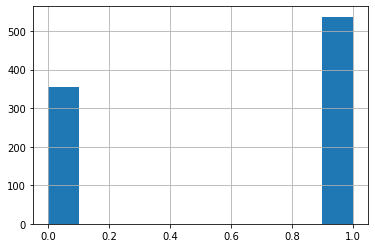

In [167]:
ax=titanic['adult_male'].astype(int).hist()

Text(0.5, 1.0, 'Men')

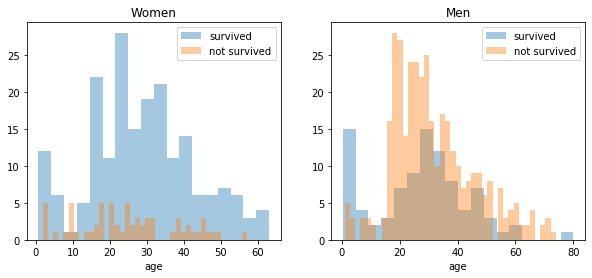

In [168]:
sur='survived'
nsur='not survived'

fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(10,4))
women=titanic[titanic['sex']=='female']
men=titanic[titanic['sex']=='male']

ax=sns.distplot(women[women[sur]==1].age.dropna(),bins=18,label=sur,ax=axes[0],kde=False)
ax=sns.distplot(women[women[sur]==0].age.dropna(),bins=40,label=nsur,ax=axes[0],kde=False)
ax.legend()
ax.set_title('Women')

ax=sns.distplot(men[men[sur]==1].age.dropna(),bins=18,label=sur,ax=axes[1],kde=False)
ax=sns.distplot(men[men[sur]==0].age.dropna(),bins=40,label=nsur,ax=axes[1],kde=False)
ax.legend()
ax.set_title('Men')

In [169]:
titanic['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

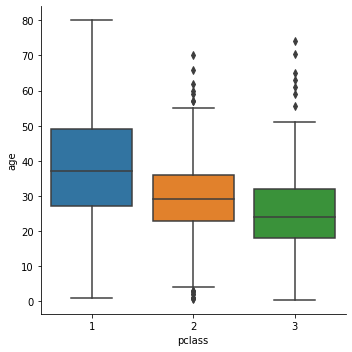

In [170]:
sns.catplot(x='pclass',y='age',data=titanic,kind='box')

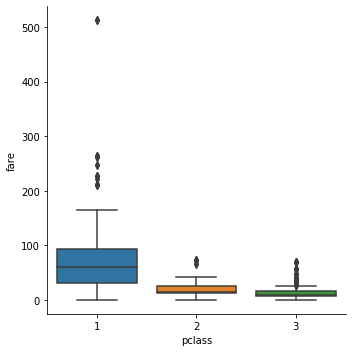

In [171]:
sns.catplot(x='pclass',y='fare',data=titanic,kind='box')

In [172]:
titanic[titanic['pclass']==1].age.mean()

38.233440860215055

In [173]:
titanic[titanic['pclass']==2].age.mean()

29.87763005780347

In [174]:
titanic[titanic['pclass']==3].age.mean()

25.14061971830986

In [175]:
def impute_age(cols):
    age=cols[0]
    pclass=cols[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return titanic[titanic['pclass']==1].age.mean()
        elif pclass ==2:
            return titanic[titanic['pclass']==2].age.mean()
        elif pclass ==3:
            return titanic[titanic['pclass']==3].age.mean()
    else:
        return age
            

In [176]:
titanic['age']=titanic[['age','pclass']].apply(impute_age,axis=1)

In [177]:
titanic['age'].isnull().sum()

0

### Analysing Embarked

In [178]:
#f=sns.FacetGrid(titanic,row='embarked',height=2.5,aspect=3)
#f.map(sns.pointplot,'pclass','survived','sex',order=None,hue_order=None)
#f.add_legend()

In [179]:
titanic['embarked'].isnull().sum()

2

In [180]:
titanic['embark_town'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [181]:
common_value='S'
titanic['embarked'].fillna(common_value,inplace=True)
titanic['embarked'].isnull().sum()

0

In [182]:
titanic.drop(labels=['deck','embark_town','alive'],inplace=True,axis=1)


In [183]:
titanic.isnull().sum()

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
class         0
who           0
adult_male    0
alone         0
dtype: int64

In [184]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int64   
 2   sex         891 non-null    object  
 3   age         891 non-null    float64 
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    float64 
 7   embarked    891 non-null    object  
 8   class       891 non-null    category
 9   who         891 non-null    object  
 10  adult_male  891 non-null    bool    
 11  alone       891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(3)
memory usage: 65.5+ KB


In [185]:
titanic['age']=titanic['age'].astype(int)
titanic['fare']=titanic['fare'].astype(int)

In [186]:
sex={'male':0,'female':1}
titanic['sex']=titanic['sex'].map(sex)

In [187]:
adult_male = {True:1, False: 0}
titanic['adult_male']=titanic['adult_male'].map(adult_male)

In [188]:
who={'man':0,'woman':1, 'child':2}
titanic['who']=titanic['who'].map(who)
titanic['who'].value_counts()

0    537
1    271
2     83
Name: who, dtype: int64

In [189]:
alone={True:1,False :0}
titanic['alone']=titanic['alone'].map(alone)

In [190]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int64   
 2   sex         891 non-null    int64   
 3   age         891 non-null    int32   
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    int32   
 7   embarked    891 non-null    object  
 8   class       891 non-null    category
 9   who         891 non-null    int64   
 10  adult_male  891 non-null    int64   
 11  alone       891 non-null    int64   
dtypes: category(1), int32(2), int64(8), object(1)
memory usage: 70.7+ KB


In [191]:
ports={'S':0,'C':1,'Q':2}
titanic['embarked']=titanic['embarked'].map(ports)

In [192]:
titanic.drop(labels=['class','who'],axis=1,inplace=True)

In [193]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,adult_male,alone
0,0,3,0,22,1,0,7,0,1,0
1,1,1,1,38,1,0,71,1,0,0
2,1,3,1,26,0,0,7,0,0,1
3,1,1,1,35,1,0,53,0,0,0
4,0,3,0,35,0,0,8,0,1,1


# Building Logistic Regression Model

In [194]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [195]:
x= titanic.drop('survived',axis=1)
y= titanic['survived']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [196]:
x_train.shape

(596, 9)

In [197]:
model=LogisticRegression(solver='lbfgs',max_iter=200)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [198]:
model.score(x_test,y_test)

0.8271186440677966

### Advanced optimisation

In [199]:
from sklearn.feature_selection import RFE

In [200]:
model = LogisticRegression(solver="lbfgs",max_iter=500)
rfe=RFE(model,5,verbose=1)
rfe = rfe.fit(x,y)

Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.


In [201]:
rfe.support_

array([ True, False, False,  True,  True, False, False,  True,  True])

In [202]:
x.head()

,pclass,sex,age,sibsp,parch,fare,embarked,adult_male,alone
0,3,0,22,1,0,7,0,1,0
1,1,1,38,1,0,71,1,0,0
2,3,1,26,0,0,7,0,0,1
3,1,1,35,1,0,53,0,0,0
4,3,0,35,0,0,8,0,1,1


In [203]:
x_selected = x[x.columns[rfe.support_]]

In [204]:
x_selected.head()

,pclass,sibsp,parch,adult_male,alone
0,3,1,0,1,0
1,1,1,0,0,0
2,3,0,0,0,1
3,1,1,0,0,0
4,3,0,0,1,1


In [205]:
x_train,x_test,y_train,y_test = train_test_split(x_selected,y,test_size=0.2,random_state=45,stratify=y)

In [206]:
x_train.shape

(712, 5)

In [208]:
model=LogisticRegression(solver='lbfgs',max_iter=500)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [209]:
model.score(x_test,y_test)

0.8547486033519553

## Accuracy measurements and scores

In [216]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,classification_report,precision_score,recall_score
from sklearn.metrics import confusion_matrix,precision_recall_curve,roc_auc_score,log_loss,roc_curve,auc

In [208]:
model=LogisticRegression(solver='lbfgs',max_iter=500)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [211]:
y_pred_prob= model.predict_proba(x_test)[:,1]

In [213]:
[fpr,tpr,th]=roc_curve(y_test,y_pred_prob)

In [218]:
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Log loss",log_loss(y_test,y_pred_prob))
print("auc",auc(fpr,tpr))
print("roc_auc score",roc_auc_score(y_test,y_pred))
      

Accuracy: 0.8547486033519553
Log loss 0.38913074764661665
auc 0.8944664031620554
roc_auc score 0.833201581027668


In [ ]:
##plotting roc_curve left